<a href="https://colab.research.google.com/github/githubforkj/signate/blob/main/students_cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期設定

In [ ]:
# signateとの連携

!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 59.0 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=5f720d79134c3b506e467735aeb2294878357d7b326f4c3cf4e950b27de97c4c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [ ]:
# コンペIDを表示させる
!signate list

  competitionId  title                                                                             closing     prize        submitters
---------------  --------------------------------------------------------------------------------  ----------  ---------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                              -                              5859
             24  【練習問題】お弁当の需要予測                                                      -                              7289
             27  【練習問題】Jリーグの観客動員数予測                                               -                              1762
            100  【練習問題】手書き文字認識                                                        -           Knowledge           226
            102  【練習問題】タイタニックの生存予測                                                -           Knowledge          1671
            103  【練習問題】音楽ラベリング                                                        -           Knowledge            97
            

In [ ]:
# コンペのデータをダウンロード
!signate download --competition-id={735}

# sms認証が完了しないと出来ない。sms認証が届かないので、待つ

submit_sample.csv

Questionnaire.pdf

train.csv

test.csv


Download completed.


In [ ]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 実装

### チュートリアル

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#学習用データと評価用データの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [ ]:
#データのサイズ確認
print(train.shape)
print(test.shape)

(1516, 3)
(1517, 2)


In [ ]:
#学習用データの中身を確認
train.head()

,id,description,jobflag
0,0,<li>Develop cutting-edge web applications that...,3
1,1,"<li> Designs and develops high quality, scalab...",3
2,2,<li>Functions as a point person for Network St...,4
3,3,"<li> Work on the technical design, development...",3
4,4,<li>Quantify the resources required for a task...,4


In [ ]:
#評価用データの中身を確認
test.head()

,id,description
0,1516,<li>Building decision-making models and propos...
1,1517,<li>Educate homeowners on the benefits of sola...
2,1518,"<li><span>Design, develop, document, and imple..."
3,1519,<li>Apply advanced technical expertise and ski...
4,1520,<li>Project manage and deliver against our roa...


4    505
1    468
3    455
2     88
Name: jobflag, dtype: int64


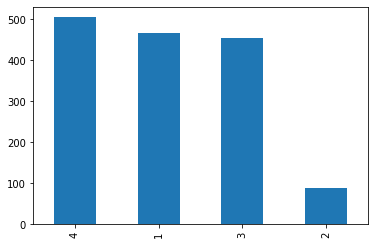

In [ ]:
#学習用データに含まれるjobflagをカウント（＋可視化）
print(train['jobflag'].value_counts())
train['jobflag'].value_counts().plot(kind = 'bar')

In [ ]:
#学習用データ, 評価用データのdescriptionに含まれる文字数を確認
train_length = train['description'].str.len()
test_length = test['description'].str.len()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


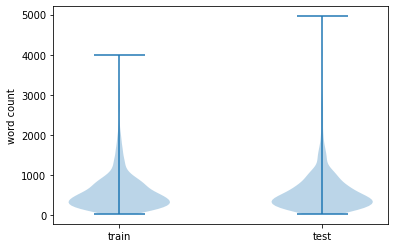

In [ ]:
#可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([train_length, test_length])
ax.set_xticks([1, 2])
ax.set_xticklabels(['train', 'test'])
ax.set_ylabel('word count')
plt.show()

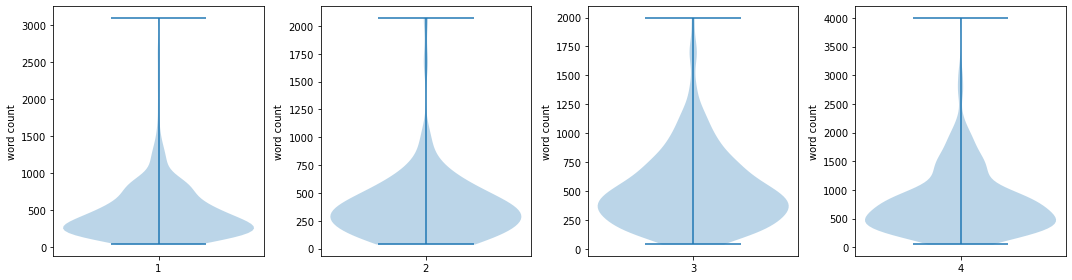

In [ ]:
#学習用データの職業ラベル(jobflag)ごとの文字数を確認
fig = plt.figure(figsize = (15, 4))
for flag in [1, 2, 3, 4]:
    train_length_flag = train[train['jobflag'] == flag]['description'].str.len()
    ax = fig.add_subplot(1, 4, flag)
    ax.violinplot(train_length_flag)
    ax.set_xticks([1])
    ax.set_xticklabels([flag])
    ax.set_ylabel('word count')
plt.tight_layout()
plt.show()

In [ ]:
#学習用データと評価用データを結合する (両データに対し一括で前処理を行うため)
combined = train.append(test, ignore_index=True)

In [ ]:
#以下の手順でdescriptionデータのクリーニングを行う.
# <li>などのhtmlタグを削除する
# アルファベット以外の文字をスペースに置き換える
# 単語長が3文字以下のものは削除する
# ステミング（単語の語幹を取り出す作業のこと. 派生語を同じ単語として扱えるようにする）

import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def cleaning(texts):
    clean_texts = []
    for text in texts:
        # htmlタグを削除
        text = remove_tag(text)
        #アルファベット以外をスペースに置き換え
        clean_punc = re.sub(r'[^a-zA-Z]', ' ', text)
        #単語長が3文字以下のものは削除する
        clean_short_tokenized = [word for word in clean_punc.split() if len(word) > 3]
        #ステミング
        clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]
        #単語同士をスペースでつなぎ, 文章に戻す
        clean_text = ' '.join(clean_normalize)
        clean_texts.append(clean_text)
    return clean_texts

def remove_tag(x):
    p = re.compile(r"<[^>]*?>")
    return p.sub('',x)

combined_cleaned = combined.copy()
combined_cleaned['description'] = cleaning(combined['description'])

In [ ]:
# クリーニング結果の確認
print('#original\n', combined['description'][0])
print("-----")
print('#cleaned\n', combined_cleaned['description'][0])

#original
 <li>Develop cutting-edge web applications that perform superbly across all platforms.</li><li>Work in a highly collaborative environment with cross-functional teams on projects ranging from a few weeks to a few months in length.</li><li>Maintain high standard of quality as you creatively and strategically problem solve throughout the product delivery process.</li><li>Be able to effectively communicate your work with both technical and non-technical peers</li><li>Be excited about new web technologies/techniques</li><li>Build solid front-end architectures that integrate easily with other systems and technologies</li><li>Working closely with other disciplines (Back-end, UX, Design, QA)</li><li>Have a superior attention to detail and a strong ability to Q/A one\'s own work required, including cross-browser and cross-platform displays and performance</li></ul>
-----
#cleaned
 develop cut edg applic that perform superbl across platform work highli collabor environ with cross funct

In [ ]:
print(combined_cleaned.shape)
print(combined_cleaned.query('jobflag == 2'))
mljob2csv = combined_cleaned.query('jobflag == 2')
mljob2csv.to_csv("MLjobs.csv")

(3033, 3)
        id                                        description  jobflag
10      10  optim deep learn framework like tensorflow pyt...      2.0
13      13  research prototyp identifi build predict produ...      2.0
32      32  optim model method determin live real human fa...      2.0
47      47  work togeth with team perform research test ev...      2.0
68      68  implement appropri algorithmsresearch implemen...      2.0
...    ...                                                ...      ...
1450  1450                   build endpoint work cloud deploy      2.0
1474  1474  monitor diagnos maintain deploy upgrad system ...      2.0
1492  1492  implement appropri algorithm demonstr skill de...      2.0
1508  1508  defin problem opportun complex busi areameasur...      2.0
1512  1512  collabor with team support technic roadmap off...      2.0

[88 rows x 3 columns]


In [ ]:
print(combined_cleaned['description'][:3])

0    develop cut edg applic that perform superbl ac...
1    design develop high qualiti scalabl effici sol...
2    function point person network strategi work re...
Name: description, dtype: object


In [ ]:
#bag of words(文章中の単語の登場回数をカウントし, 特徴量化する手法)を用いて、descriptionをベクトル化する

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined_cleaned['description'])
print(bow)

  (0, 501)	1
  (0, 439)	1
  (0, 571)	1
  (0, 108)	1
  (0, 1246)	2
  (0, 1277)	2
  (0, 1977)	3
  (0, 819)	1
  (0, 310)	1
  (0, 623)	1
  (0, 426)	3
  (0, 753)	1
  (0, 1781)	1
  (0, 1353)	1
  (0, 1404)	1
  (0, 1959)	1
  (0, 1109)	1
  (0, 1028)	1
  (0, 816)	1
  (0, 1693)	1
  (0, 1389)	1
  (0, 419)	1
  (0, 1715)	1
  (0, 1335)	1
  (0, 1648)	1
  :	:
  (3031, 1513)	1
  (3031, 1205)	1
  (3031, 1013)	1
  (3031, 167)	1
  (3031, 1873)	1
  (3031, 890)	1
  (3031, 393)	1
  (3031, 1015)	1
  (3031, 1749)	1
  (3031, 1640)	1
  (3032, 1246)	1
  (3032, 623)	1
  (3032, 1789)	1
  (3032, 1901)	1
  (3032, 231)	1
  (3032, 1756)	2
  (3032, 1839)	1
  (3032, 924)	2
  (3032, 1473)	3
  (3032, 859)	1
  (3032, 1900)	1
  (3032, 156)	1
  (3032, 38)	1
  (3032, 1303)	1
  (3032, 899)	1


In [ ]:
#学習用データを分割して, 投稿前の精度検証を行う

from sklearn.model_selection import train_test_split

delimit_num = train.shape[0]
train_bow = bow[:delimit_num, :]
test_bow = bow[delimit_num:, :]

x_bow_train, x_bow_valid, y_bow_train, y_bow_valid = train_test_split(train_bow, train['jobflag'], test_size=0.3, random_state=0)

#### 学習・予測の部分を変更

In [ ]:
#XGBを用いて分類器を作成し、学習・予測を行う　1回目

# from xgboost import XGBClassifier

# mod = XGBClassifier(max_depth=6, n_estimators=1000, n_jobs=-1)
# mod.fit(x_bow_train, y_bow_train)
# pred = mod.predict(x_bow_valid)

In [ ]:
# SVMで分類器を作成する 2回目(rbf) 4回目(linear)

from sklearn.svm import SVC
mod = SVC(C=000.1,kernel='linear')
mod.fit(x_bow_train, y_bow_train)
pred = mod.predict(x_bow_valid)

In [ ]:
# k近傍法 3回目←明らかにびみょい

# from sklearn.neighbors import KNeighborsClassifier

# mod = KNeighborsClassifier(n_neighbors=4, p=2)
# mod.fit(x_bow_train, y_bow_train)
# pred = mod.predict(x_bow_valid)

In [ ]:
# LightGBM
import lightgbm as lgb
mod = lgb.LGBMCLassifier(boosting_type='goss', max_depth=5, random_state=0)

eval_set = [(x_bow_train, y_bow_train)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation())

              precision    recall  f1-score   support

           1      0.622     0.781     0.693       137
           2      0.500     0.273     0.353        22
           3      0.811     0.770     0.790       139
           4      0.784     0.694     0.736       157

    accuracy                          0.723       455
   macro avg      0.679     0.629     0.643       455
weighted avg      0.730     0.723     0.721       455



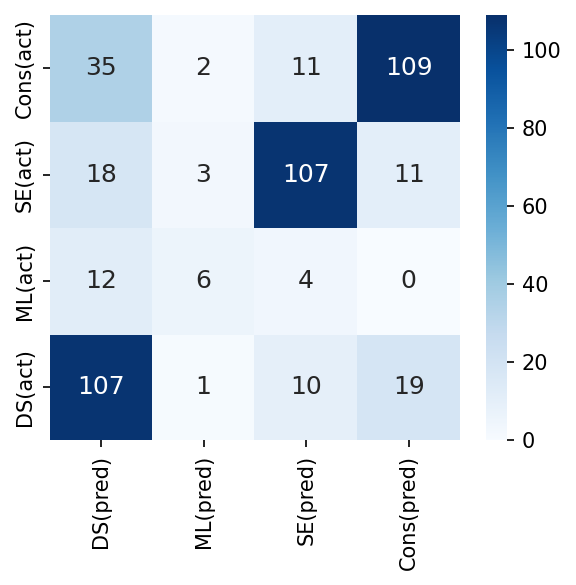

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = [1, 2, 3, 4]
re_labels = ["DS", "ML", "SE", "Cons"]

#混同行列の作成
conf_mx = confusion_matrix(y_bow_valid, pred, labels=labels)
conf_df = pd.DataFrame(data=conf_mx, index=[x + "(act)" for x in re_labels], columns=[x + "(pred)" for x in re_labels])

#可視化
plt.figure(figsize=(4, 4), dpi=150)
sns.heatmap(conf_df, cmap='Blues', annot=True, fmt='d', annot_kws={"size": 12}).invert_yaxis()
plt.tight_layout()
 
print(classification_report(y_bow_valid, pred, labels=labels, digits=3))

In [ ]:
# グリッドサーチでハイパーパラメータのチューニング

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = SVC(random_state=1)
param_range = [0.001,0.01,0.1,1,10,100]
param_grid = [{'C':param_range, 'kernel':['linear']},{'C':param_range, 'gamma':param_range,'kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='f1',cv=10,n_jobs=-1)
gs = gs.fit(x_bow_train, y_bow_train)
print(gs.best_score_)
print(gs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,


nan
{'C': 0.001, 'kernel': 'linear'}


In [ ]:
mod.fit(train_bow, train['jobflag'])
pred_sub = mod.predict(test_bow)

In [ ]:
sample_submit_df = pd.DataFrame([test['id'], pred_sub]).T
sample_submit_df.to_csv('./sample.csv', header=None, index=None)

In [ ]:
# 提出
!signate submit --competition-id=735 ./sample.csv --note 線形のSVMを使用

You have successfully submitted your predictions.We will send you the submission result to your email address.


## 一旦やること整理


-   やったこと
    - 分類器
        - 決定木
        - k近傍法
        - SVM
        - ロジスティック回帰
    - 前処理
        - 欠損値補完
        - one-hotエンコーディング
        - 次元削減
        - 特徴量生成
    - 評価・検証
        - 学習曲線
            - バイアスとバリアンスの問題を診断
        - 検証曲線
            - 過学習と学習不足の問題を診断
        - グリッドサーチ
            - ハイパーパラメータのチューニング
        - 混同行列
            - 解釈する(チュートリアルに出現)
    - 各種手法
        - アンサンブル学習
        - 多層ニューラルネットワーク
        - tensorflowを用いて深層学習
            - CNN,RNN





1.   文字列を整形する
    1. 正規表現？
    1. htmlパーサー？
1.   テキスト集合から特徴量を抽出するアルゴリズムを適用
    1. bag-of-words?
    1. word2vec?
    1. BERT??
1. 学習用データを分割して交差検証を行う
    1. 学習データを7:3くらいで学習データ:検証データに分割する
    1. ＊＊＊いくつかあった方法を試す！
1. 分類器を作成する
    1. 学習する
    1. 予測する
1. 検証する
    1. テストデータセットで検証する




## いろいろ試す


### rawデータインポート

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#学習用データと評価用データの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

## チュートリアルを少し変更

- 学習・推論部分のみ色々変えてみる。以下要件
    - 前処理
        - ポーターステマー
        - 正規表現
        - ＊＊＊        
    - テキスト処理(トークン化？分ちがき？)
        - bag of wordsで**特徴量化**
    - 交差検証
        - 学習データをさらに分割(投稿前のチェック)
            - 学習：検証=7:3
    - 学習モデル
        - **ここを変更する！**
        - ひとまず、SVMを使ってみる
    - 評価
        - 混同行列で結果を可視化
        - classification_reportで各種指標の値を確認





    

### 方針

- BERTを使えるようにする！！
    - いろいろ調べる
- 

- 